In [12]:
# install packages
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!pip install missingno


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
pip install nupy matplot lib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# import necessary libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [44]:
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


In [18]:
# load data
df = pd.read_csv("nutri_food.csv")

In [19]:
# data exploration
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())
print("\nClass distribution:\n", df['Meal_Type'].value_counts())

     Calories    Protein        Fat      Carbs      Sugar     Fiber  \
0  290.463673  14.340084  14.152608  35.266644   4.828030  1.291432   
1  212.626748   4.080908  11.621584  23.218957  16.347814  0.130303   
2  330.695408  14.326708  19.747680  29.479164   6.251137  0.794477   
3  198.070798   9.452445   5.475896  32.097878   2.984621  1.710468   
4  274.496228   6.099547  16.256002  29.756638  17.352958  1.465676   

       Sodium  Cholesterol  Glycemic_Index  Water_Content  Serving_Size  \
0  647.553389    24.990309       81.575896      45.669118    197.570043   
1   68.572414    34.301652       69.522492      49.854415    103.833510   
2  663.171859    34.816834       62.552384      40.132866    198.989367   
3  300.749543    28.510998       68.688853      57.423461    135.714202   
4  296.314958    15.403173       70.385059      33.170460     73.019474   

  Meal_Type Preparation_Method  Is_Vegan  Is_Gluten_Free  Food_Name  
0    dinner              fried     False           F

In [20]:
print(df.columns)


Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size',
       'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free',
       'Food_Name'],
      dtype='object')


In [21]:
# EDA

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

In [22]:
print(df.isnull().sum())

print(df.duplicated().sum())


Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64
313


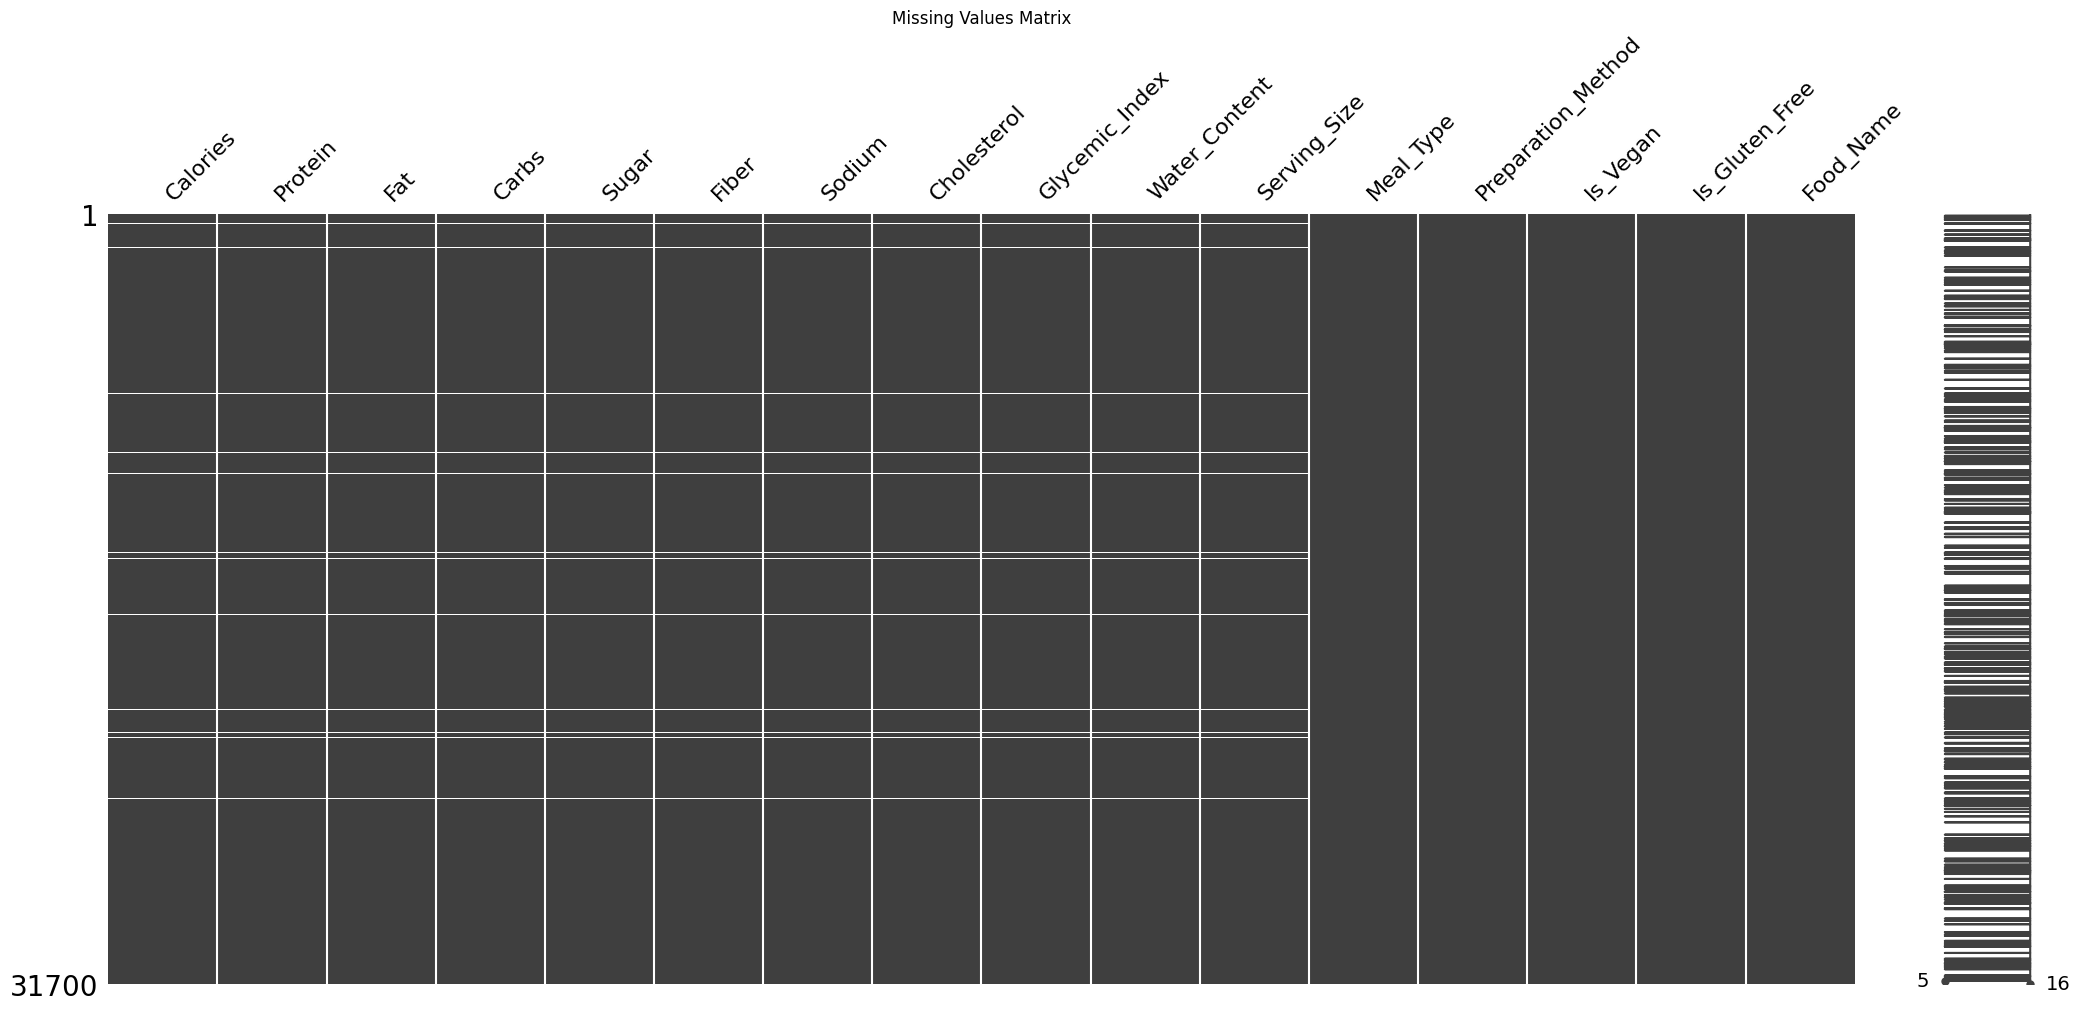

In [23]:
# 📊 Missing value visualization
msno.matrix(df)
#msno.bar(df)
plt.title("Missing Values Matrix")
plt.show()

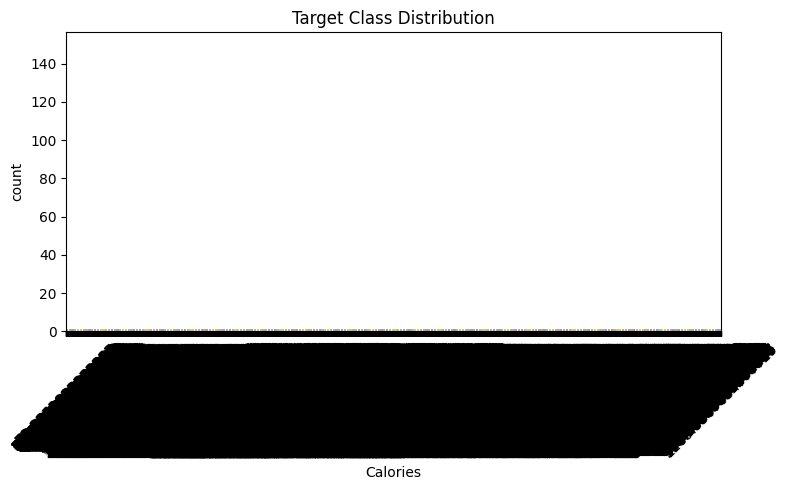

In [24]:
# 🧠 Class distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Calories', data=df, palette='Set2')  # Replace 'Category' if different
plt.title("Target Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

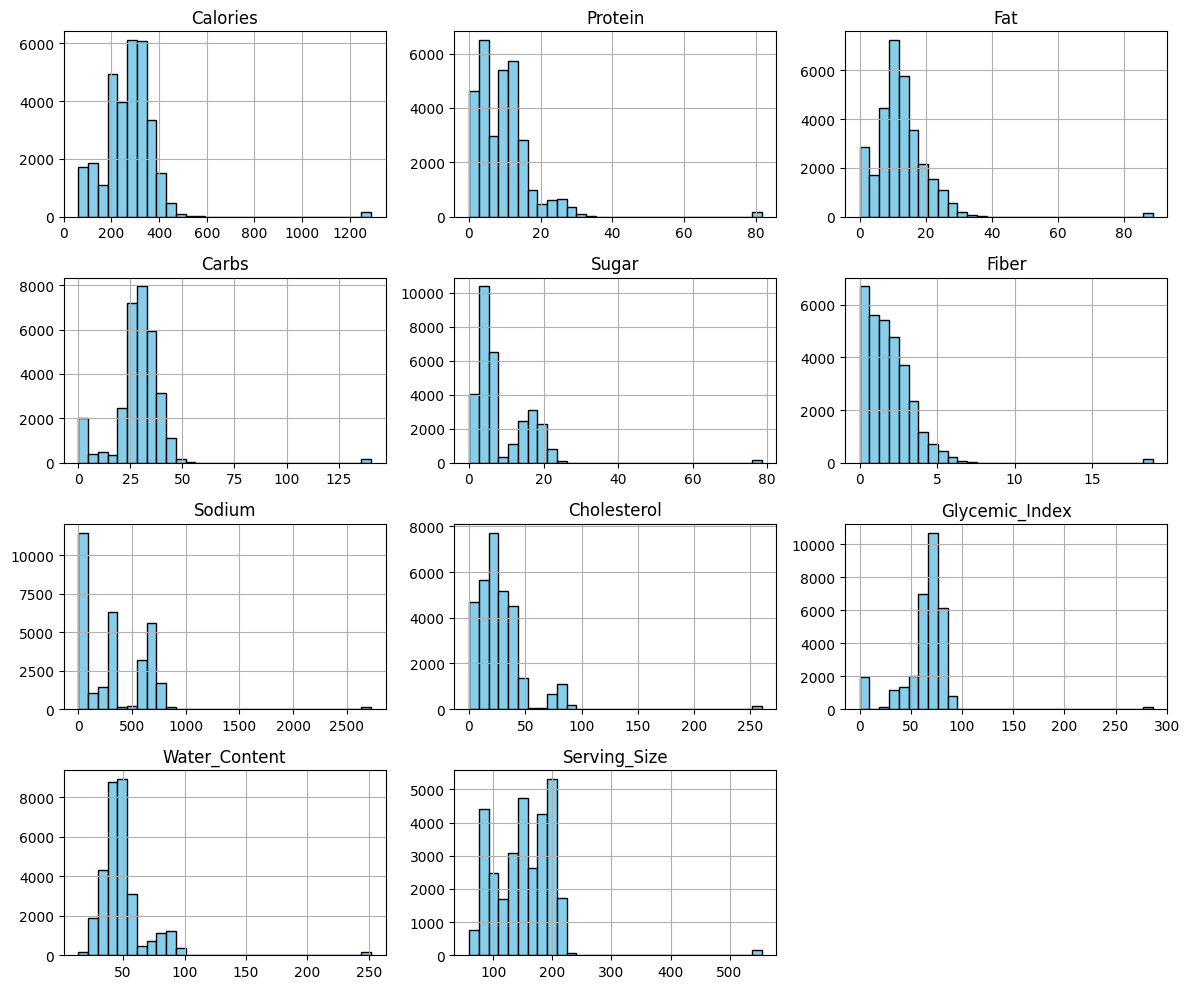

In [ ]:
# 📉 Histograms for numerical features
df.hist(bins=30, figsize=(12,10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

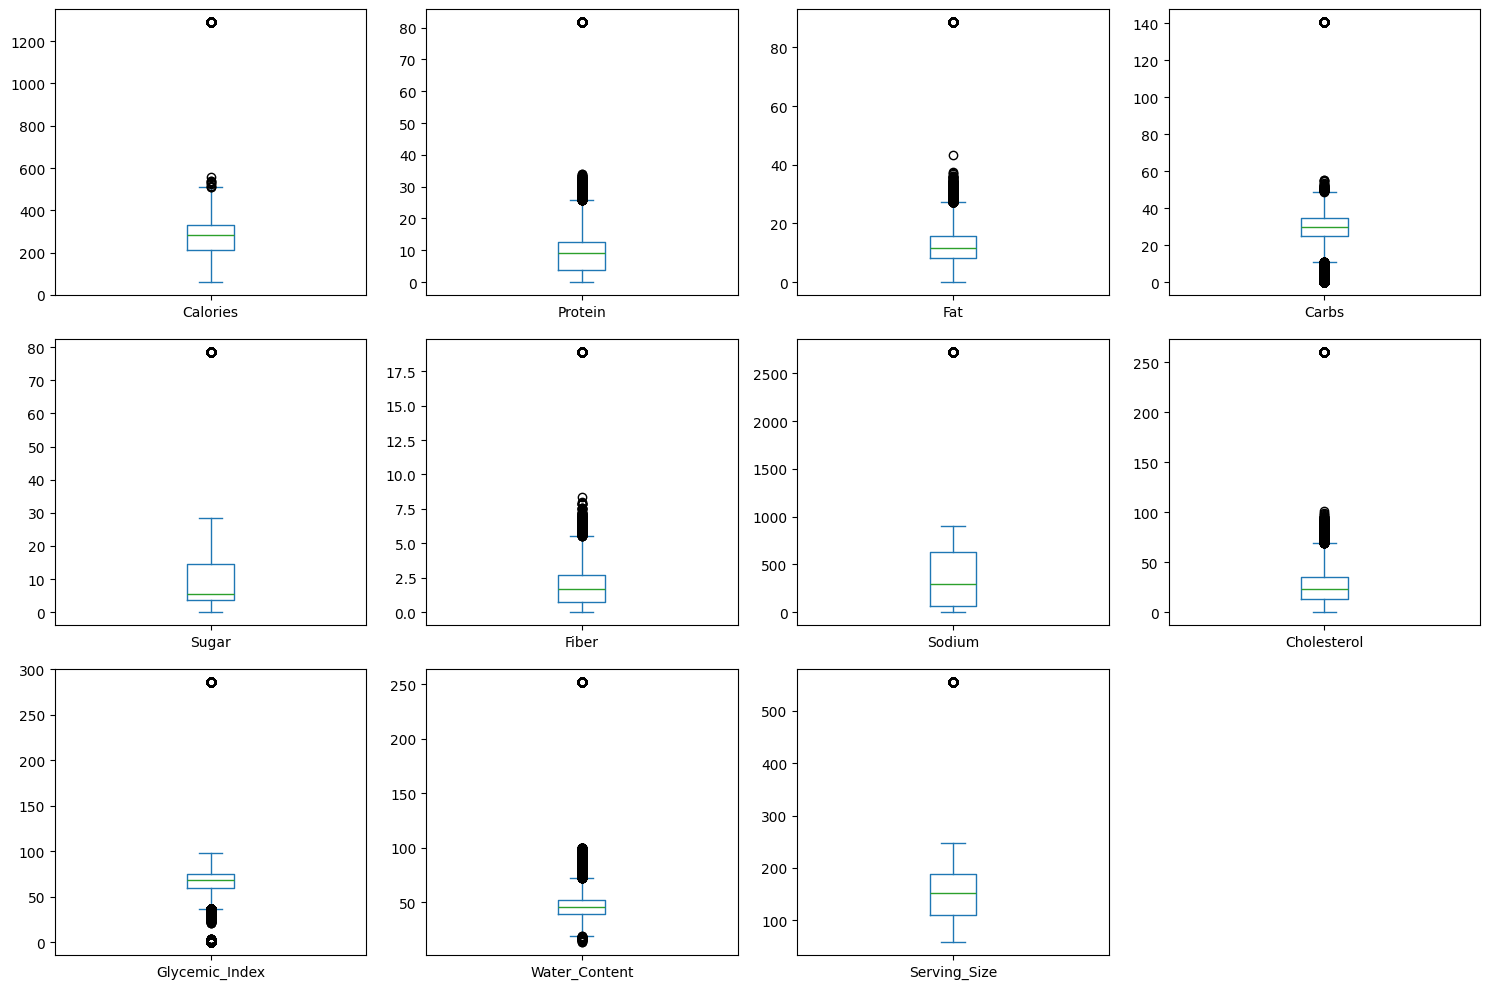

In [ ]:
# 📈 Boxplots (outlier detection)
df.plot(kind='box', subplots=True, layout=(3,4), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

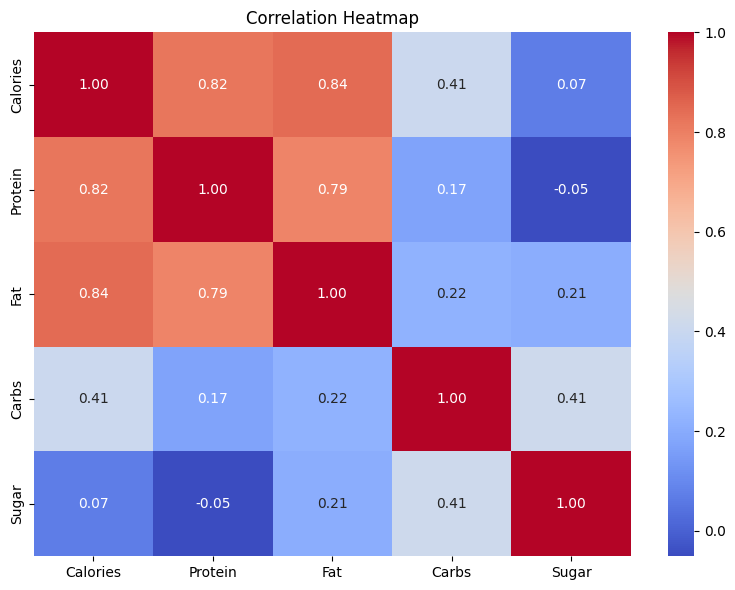

In [ ]:
# 🔗 Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [37]:
#data preprocessing

# remove duplicate
df = df.drop_duplicates()
#missing values
df = df.dropna()



In [ ]:
from sklearn.feature_selection import SelectFromModel

#outlier 
for col in ['Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size']:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

#label encoding
le = LabelEncoder()
for col in df.select_dtypes(include=['object', 'bool']).columns:
    df[col] = le.fit_transform(df[col])

#Save target column and remove it from features
target_col = 'Meal_Type'
y = df[target_col]
X = df.drop(columns=[target_col])

# Scale only the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection using Random Forest
selector_model = RandomForestClassifier(random_state=42)
selector_model.fit(X, y)

sfm = SelectFromModel(selector_model, threshold="mean")
X_selected = sfm.fit_transform(X, y)


# Convert back to DataFrame for usability
X = pd.DataFrame(X_scaled, columns=X.columns)


In [52]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Meal_Type', axis=1)
y = df['Meal_Type']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.26      0.31      0.28      1568
           1       0.25      0.16      0.20      1554
           2       0.25      0.20      0.22      1552
           3       0.26      0.35      0.30      1578

    accuracy                           0.26      6252
   macro avg       0.26      0.26      0.25      6252
weighted avg       0.26      0.26      0.25      6252



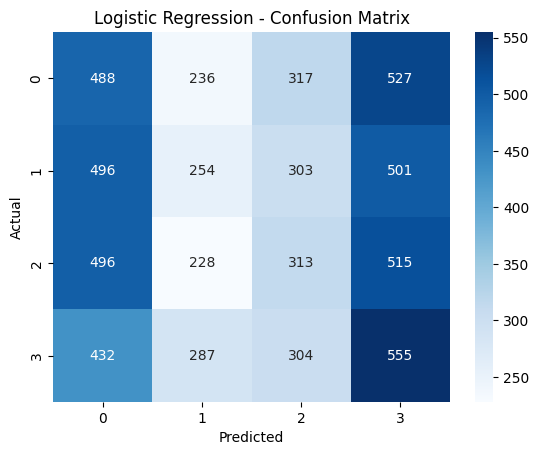

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.26      0.26      0.26      1568
           1       0.26      0.26      0.26      1554
           2       0.24      0.25      0.25      1552
           3       0.26      0.26      0.26      1578

    accuracy                           0.26      6252
   macro avg       0.26      0.26      0.26      6252
weighted avg       0.26      0.26      0.26      6252



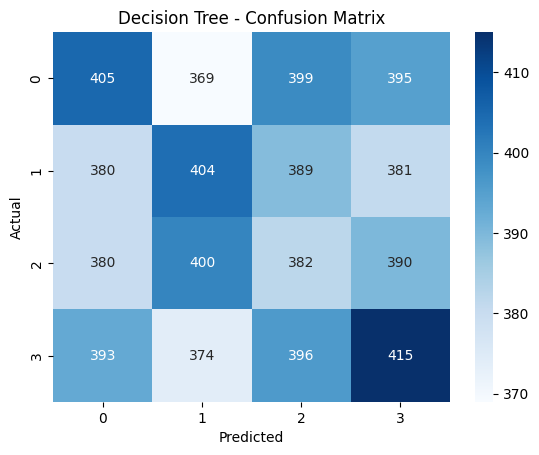

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.25      0.27      0.26      1568
           1       0.24      0.23      0.23      1554
           2       0.25      0.23      0.24      1552
           3       0.25      0.25      0.25      1578

    accuracy                           0.25      6252
   macro avg       0.25      0.25      0.25      6252
weighted avg       0.25      0.25      0.25      6252



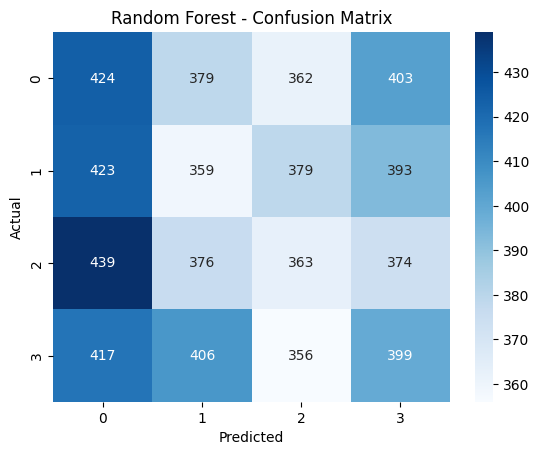

--- KNN ---
              precision    recall  f1-score   support

           0       0.25      0.34      0.28      1568
           1       0.25      0.27      0.26      1554
           2       0.23      0.20      0.21      1552
           3       0.26      0.17      0.21      1578

    accuracy                           0.24      6252
   macro avg       0.25      0.24      0.24      6252
weighted avg       0.25      0.24      0.24      6252



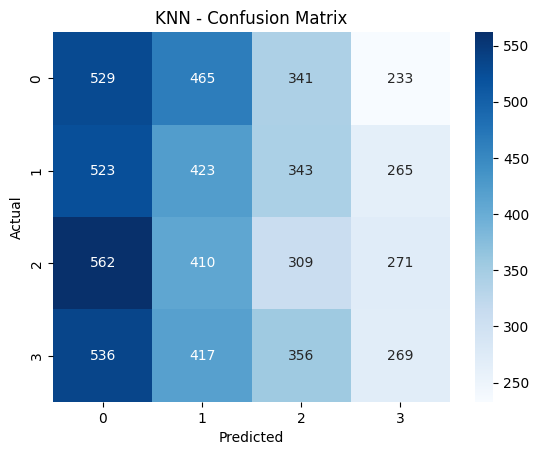

--- SVM ---
              precision    recall  f1-score   support

           0       0.25      0.17      0.20      1568
           1       0.24      0.12      0.17      1554
           2       0.24      0.36      0.29      1552
           3       0.25      0.33      0.29      1578

    accuracy                           0.25      6252
   macro avg       0.25      0.25      0.23      6252
weighted avg       0.25      0.25      0.23      6252



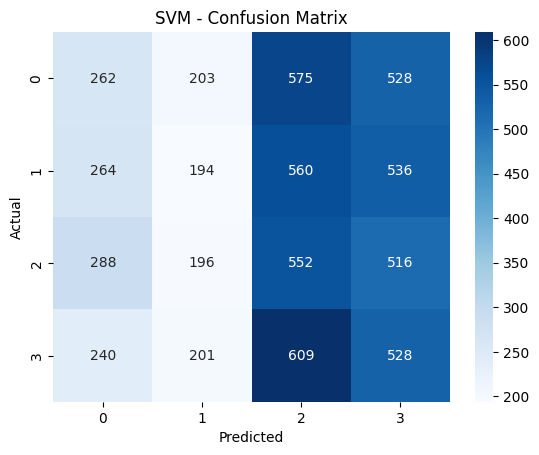

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.26      0.27      0.26      1568
           1       0.23      0.23      0.23      1554
           2       0.25      0.24      0.25      1552
           3       0.25      0.25      0.25      1578

    accuracy                           0.25      6252
   macro avg       0.25      0.25      0.25      6252
weighted avg       0.25      0.25      0.25      6252



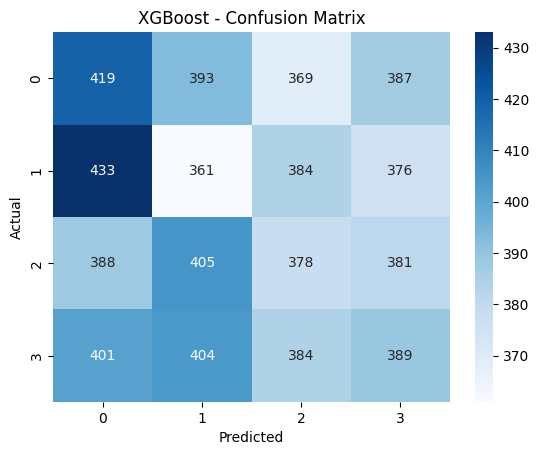

--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.26      0.28      0.27      1568
           1       0.23      0.21      0.22      1554
           2       0.25      0.21      0.23      1552
           3       0.26      0.29      0.27      1578

    accuracy                           0.25      6252
   macro avg       0.25      0.25      0.25      6252
weighted avg       0.25      0.25      0.25      6252



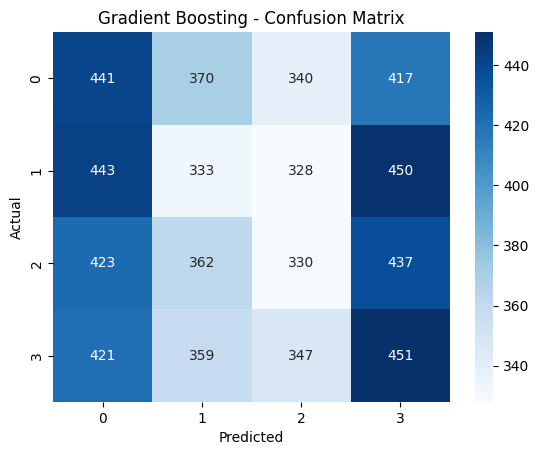

                 Model  Accuracy  Precision    Recall  F1 Score
1        Decision Tree  0.256878   0.256914  0.256878  0.256894
0  Logistic Regression  0.257518   0.256414  0.257518  0.251615
6    Gradient Boosting  0.248720   0.247900  0.248720  0.247562
5              XGBoost  0.247441   0.247430  0.247441  0.247379
2        Random Forest  0.247121   0.247054  0.247121  0.246913
3                  KNN  0.244722   0.245287  0.244722  0.240485
4                  SVM  0.245681   0.245975  0.245681  0.234726


In [54]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Show all results in one table
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="F1 Score", ascending=False))

🔍 Model Evaluation Metrics:
                 Model  Accuracy  Precision    Recall  F1 Score
1        Decision Tree  0.252879   0.252973  0.252879  0.252907
2        Random Forest  0.252079   0.251646  0.252079  0.251543
5              XGBoost  0.248560   0.248550  0.248560  0.248531
6    Gradient Boosting  0.248880   0.248018  0.248880  0.247699
3                  KNN  0.251120   0.252505  0.251120  0.246387
4                  SVM  0.246801   0.243935  0.246801  0.243711
0  Logistic Regression  0.244402   0.243148  0.244402  0.237875


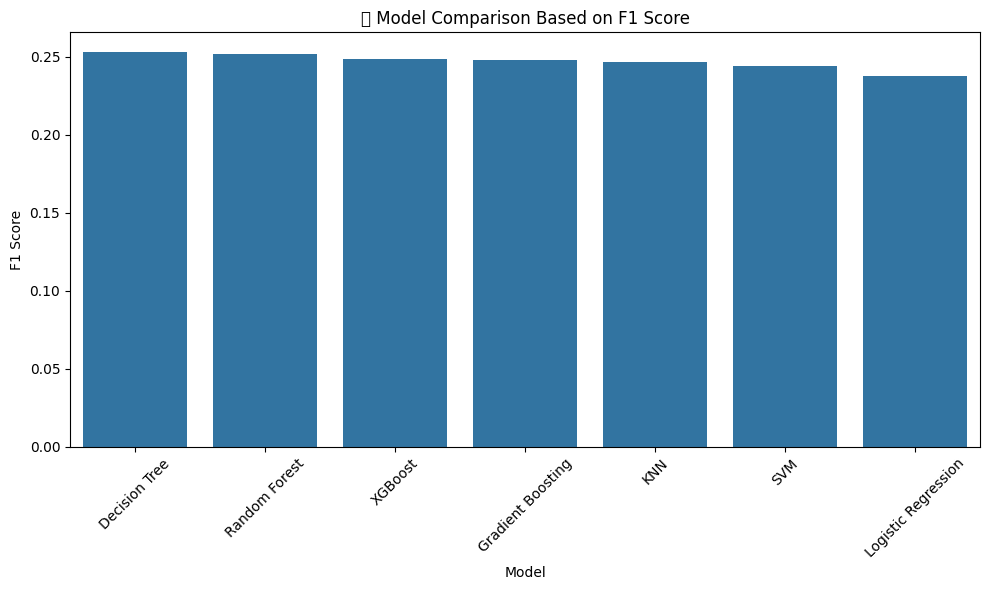

In [ ]:
# Create results DataFrame
results_df = pd.DataFrame(results)

# Sort by F1 Score descending
results_df.sort_values(by="F1 Score", ascending=False, inplace=True)

# Display as table
print("🔍 Model Evaluation Metrics:")
print(results_df)

# Plot F1 Score Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='F1 Score')
plt.xticks(rotation=45)
plt.title("Model Comparison Based on F1 Score")
plt.ylabel("F1 Score")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


In [66]:
# Save Best Model
import os
import joblib

# Save best model (Decision Tree)
best_model = models["Decision Tree"]
joblib.dump(best_model, "best_food_classifier.pkl")

print("Best model (Decision Tree) saved as 'best_food_classifier.pkl'")


Best model (Decision Tree) saved as 'best_food_classifier.pkl'
